## Four algorithms in Qiskit Part 2

In [1]:
# Importing libraries

from qiskit import *
import numpy as np
import math
import random
from qiskit.visualization import plot_histogram

from qiskit.providers.fake_provider import FakeJakarta, FakeNairobi

### Bernstein-Vazirani Algorithm

In [2]:
""" Defining a general oracle for the algorithm
    Input: secret_num - the secret string(to be encoded as black box) 
                        which is to be deteremined from the Bernstein-Vazirani algorithm"""


def oracle(secret_num):
    
    qc = QuantumCircuit(len(secret_num)+1)
    
    for iz, val in enumerate(reversed(secret_num)):     # Reversing the secret number to match the order of 
                                                        # qiskit's qubits
        
        if(val=='1'):
        
            qc.cx(iz, len(secret_num))            # Applying cx to the qubit corresponding to 1 in secret number
    
    return qc


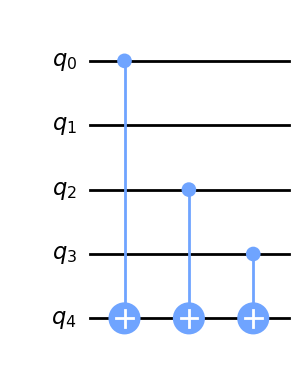

In [3]:
# Checking the oracle function for bitstring '1101'

secret_num = '1101'
cir = oracle(secret_num)
cir.draw('mpl')

In [4]:
""" Defining a function for Bernstein-Vazirani algorithm 
    Input: N - Length of the secret bitstring to be determined
           oracle1- black box encoding the secret number 
    Output: qc - the quantum circuit to be run on a simulator to get the final output """

def bv_algo_gen(N, oracle):
    
    # Creating a quantum circuit of 'N+1' qubits where N is the number of bits in the input bitstring

    qc = QuantumCircuit(N+1, N)

    # Applying X gate on the helper qubit to change it's state from 0 to 1

    qc.x(N)
    qc.barrier()                   # Barrier for better visualization

    # Applying Hadamard gates on all qubits to create superposition and access all the possible cases at same time

    qc.h(range(0,N+1))
    qc.barrier()                  # Barrier for better visualization

    # Applying the oracle for the funtion to the quantum circuit

    qc.append(oracle, range(N+1))
    qc.barrier()                  # Barrier for better visualization

    # Applying Hadamard gates to all qubits 

    qc.h(range(N+1))
    qc.barrier()                  # Barrier for better visualization

    # Measuring first N qubits to find if the function is constant or balanced

    qc.measure(range(N), range(N))

    return qc

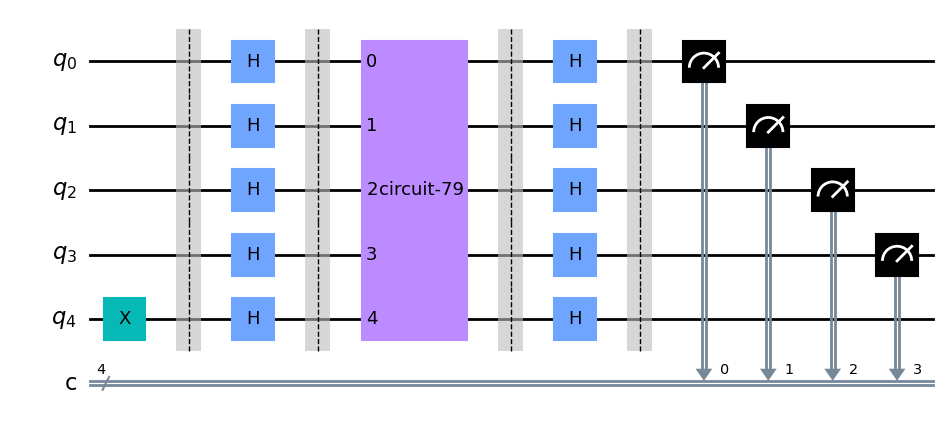

In [5]:
# Testing the algorithm for '1101'

secret_num = '1101'
ora  = oracle(secret_num)

N = len(secret_num)

q1 = bv_algo_gen(N, ora)
q1.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


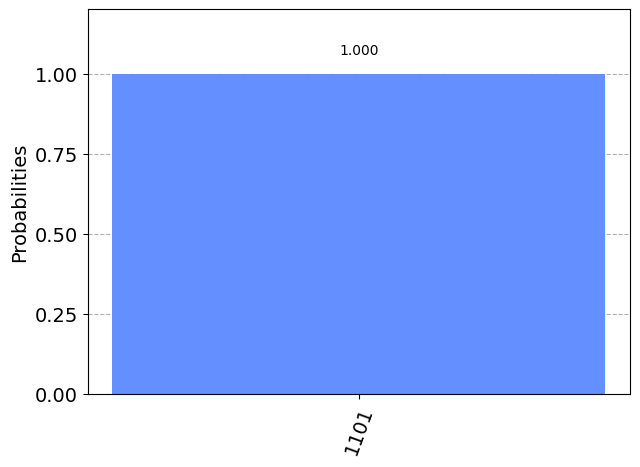

In [6]:
# Running on non-noisy simulator 1

backend = Aer.get_backend('aer_simulator')
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

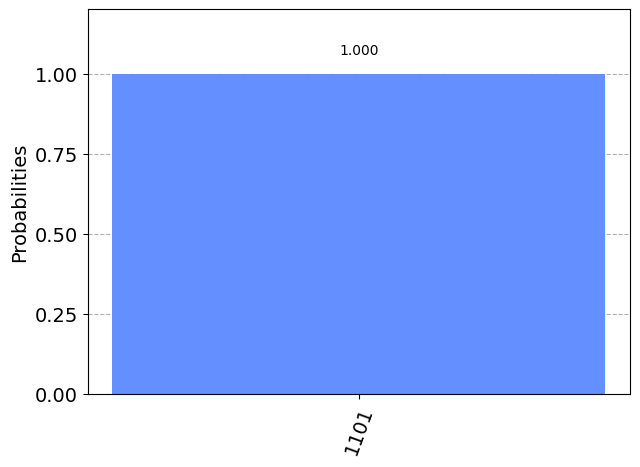

In [7]:
# Running on non-noisy simulator 2

backend = Aer.get_backend('qasm_simulator')
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

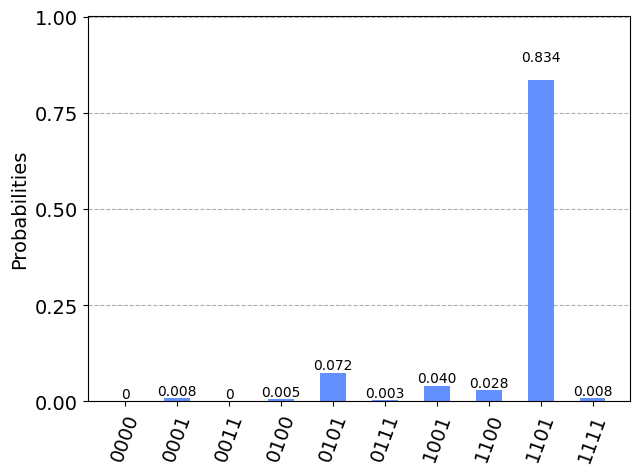

In [8]:
# Running on noisy simulator 1

backend = FakeJakarta()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

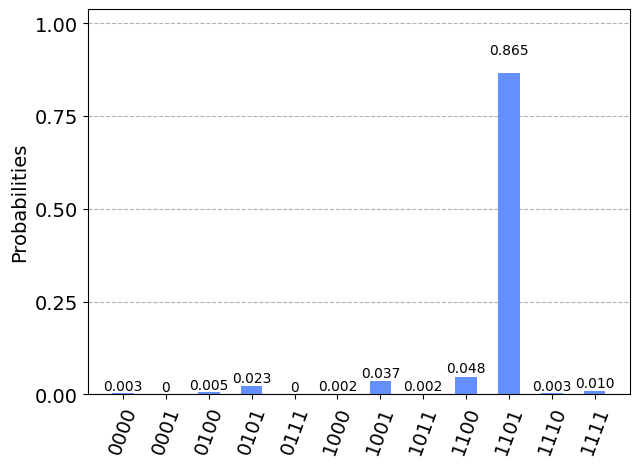

In [9]:
# Running on noisy simulator 2

backend = FakeNairobi()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

In [10]:
# Defining a function that gives the output directly without running many cells

# secret_num - the secret string(to be encoded as black box)
# sim: simulator on which you want to run the algorithm
#.    - 1: non-noisy aer simulator
#       2: non-noisy qasm simulator
#       3: noisy simulator FakeJakarta
#       4: noisy simulator FakeNairobi
# Output: counts, maximum number of counts are obtained for the secret string

def run(secret_num, sim):
    
    oracle_1  = oracle(secret_num)

    N = len(secret_num)
    q1 = bv_algo_gen(N, oracle_1)
    
    count = 0
    
    if sim==1:
        
        backend = Aer.get_backend('aer_simulator')
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
    
    elif sim == 2:
        
        backend = Aer.get_backend('qasm_simulator')
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
        
    elif sim == 3:
        
        backend = FakeJakarta()
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
        
    else:
        
        backend = FakeNairobi()
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
    
    return count

In [11]:
# Testing the algorithm for '10101' on all 4 simulators

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


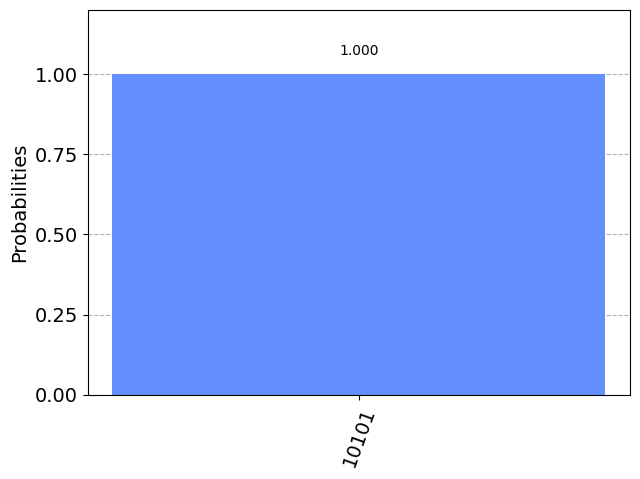

In [12]:
plot_histogram(run('10101', 1))

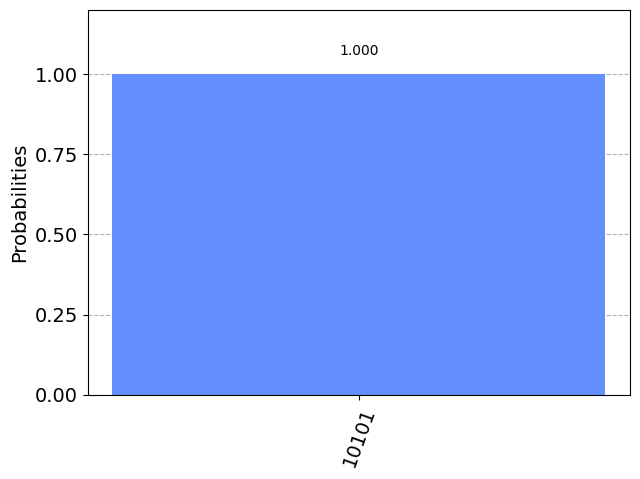

In [13]:
plot_histogram(run('10101', 2))

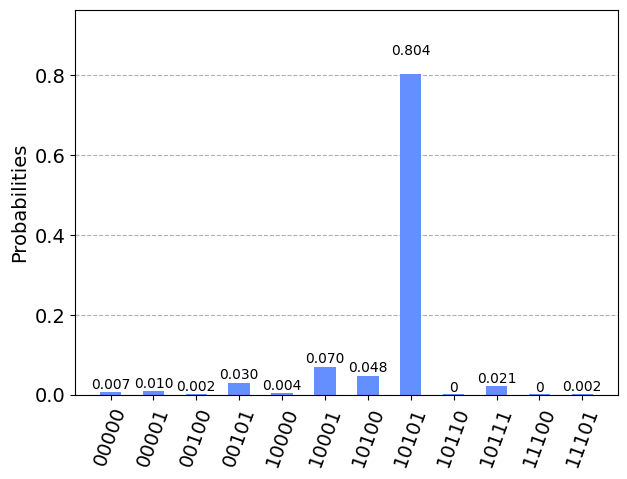

In [14]:
plot_histogram(run('10101', 3))

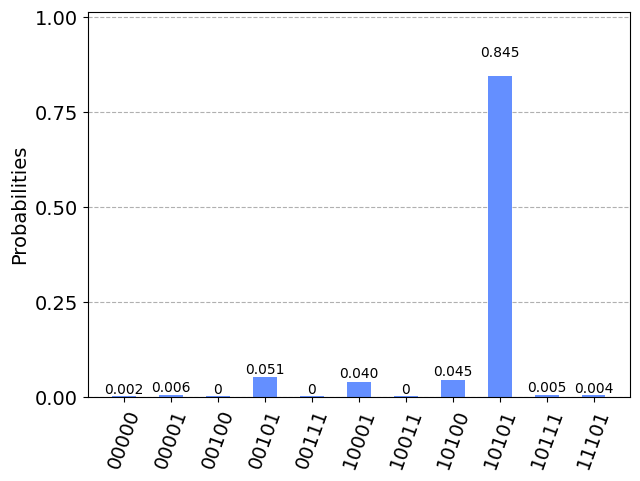

In [15]:
plot_histogram(run('10101', 4))

In [16]:
# Testing the algorithm for '10101001' on all 4 simulators

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


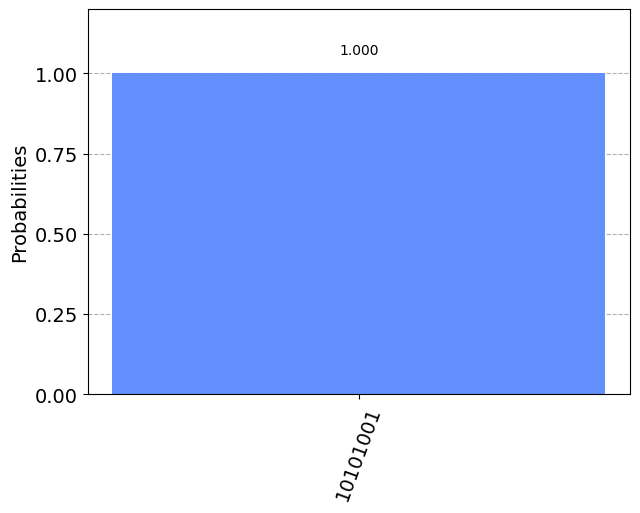

In [18]:
plot_histogram(run('10101001', 1))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


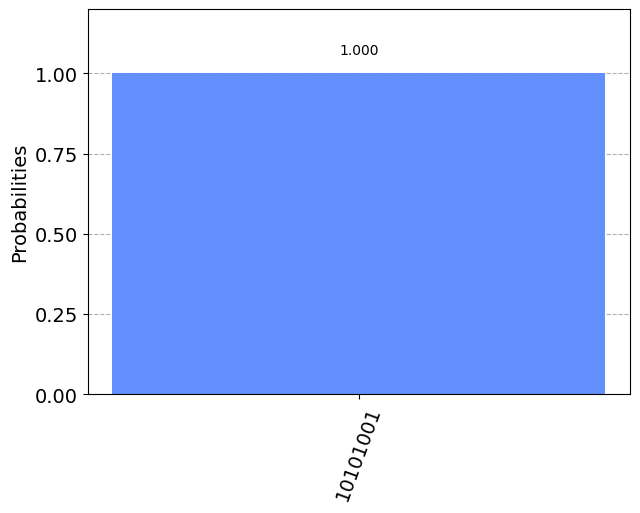

In [19]:
plot_histogram(run('10101001', 2))

In [20]:
plot_histogram(run('10101001', 3))

TranspilerError: 'Number of qubits (9) in circuit-4915 is greater than maximum (7) in the coupling_map'

In [21]:
plot_histogram(run('10101001', 4))

TranspilerError: 'Number of qubits (9) in circuit-4919 is greater than maximum (7) in the coupling_map'